In [1]:
import sys
sys.path.append('..')
import CustomPipeline as cp
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

import pickle

pd.set_option('display.max_rows', 300)

## Lasso 3-Fold Cross Validation searching for best alpha

In [2]:
data = cp.clean('data/train.csv')

data['Log_SalePrice'] = np.log(data.SalePrice)
X = data.drop(['PID', 'SalePrice', 'Log_SalePrice'], axis=1, inplace=False)
y = data['Log_SalePrice']

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

alpha_list = np.linspace(0.0001, 0.02, 1000)
results = []

for alpha in alpha_list:
    print(alpha)
    lasso = Lasso(fit_intercept=True, alpha=alpha, max_iter=350000, tol=0.00001)
    score = cross_val_score(lasso, X_scaled, y, cv=3).mean()
    results.append({'alpha':alpha, 'model': lasso, 'score': score})
    
resultsDF = pd.DataFrame(results)

0.0001
0.00011991991991991993
0.00013983983983983984
0.00015975975975975976
0.0001796796796796797
0.00019959959959959958
0.00021951951951951952
0.00023943943943943946
0.00025935935935935935
0.0002792792792792793
0.0002991991991991992
0.0003191191191191191
0.00033903903903903905
0.00035895895895895894
0.0003788788788788789
0.00039879879879879877
0.0004187187187187187
0.00043863863863863865
0.00045855855855855853
0.00047847847847847847
0.0004983983983983984
0.0005183183183183184
0.0005382382382382383
0.0005581581581581581
0.0005780780780780781
0.000597997997997998
0.0006179179179179179
0.0006378378378378379
0.0006577577577577578
0.0006776776776776778
0.0006975975975975976
0.0007175175175175175
0.0007374374374374375
0.0007573573573573574
0.0007772772772772774
0.0007971971971971972
0.0008171171171171171
0.0008370370370370371
0.000856956956956957
0.000876876876876877
0.0008967967967967968
0.0009167167167167167
0.0009366366366366367
0.0009565565565565566
0.0009764764764764765
0.0009963963963

0.00782892892892893
0.00784884884884885
0.007868768768768769
0.007888688688688689
0.007908608608608609
0.007928528528528527
0.007948448448448447
0.007968368368368367
0.007988288288288287
0.008008208208208207
0.008028128128128127
0.008048048048048047
0.008067967967967967
0.008087887887887887
0.008107807807807807
0.008127727727727727
0.008147647647647646
0.008167567567567566
0.008187487487487486
0.008207407407407406
0.008227327327327326
0.008247247247247246
0.008267167167167166
0.008287087087087086
0.008307007007007006
0.008326926926926926
0.008346846846846846
0.008366766766766766
0.008386686686686686
0.008406606606606606
0.008426526526526526
0.008446446446446446
0.008466366366366366
0.008486286286286285
0.008506206206206205
0.008526126126126125
0.008546046046046045
0.008565965965965965
0.008585885885885885
0.008605805805805805
0.008625725725725725
0.008645645645645645
0.008665565565565565
0.008685485485485485
0.008705405405405405
0.008725325325325325
0.008745245245245245
0.0087651651651

0.015836736736736735
0.015856656656656656
0.015876576576576575
0.015896496496496496
0.015916416416416414
0.015936336336336336
0.015956256256256254
0.015976176176176176
0.015996096096096094
0.016016016016016016
0.016035935935935934
0.016055855855855856
0.016075775775775774
0.016095695695695696
0.016115615615615614
0.016135535535535536
0.016155455455455454
0.016175375375375375
0.016195295295295294
0.016215215215215215
0.016235135135135133
0.016255055055055055
0.016274974974974973
0.016294894894894895
0.016314814814814813
0.016334734734734735
0.016354654654654653
0.016374574574574575
0.016394494494494493
0.016414414414414415
0.016434334334334333
0.016454254254254255
0.016474174174174173
0.016494094094094094
0.016514014014014013
0.016533933933933934
0.016553853853853853
0.016573773773773774
0.016593693693693692
0.016613613613613614
0.016633533533533532
0.016653453453453454
0.016673373373373372
0.016693293293293294
0.016713213213213212
0.016733133133133134
0.016753053053053052
0.01677297297

<AxesSubplot:xlabel='alpha', ylabel='score'>

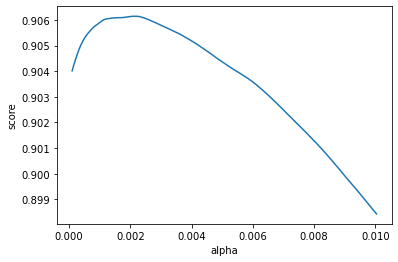

In [3]:
resultsDF = resultsDF.iloc[0:500,]
sns.lineplot(data=resultsDF, x="alpha", y="score")

In [4]:
optimal_model = resultsDF['model'][resultsDF['score'] == resultsDF['score'].max()].values[0]
optimal_model

Lasso(alpha=0.0020919919919919917, max_iter=350000, tol=1e-05)

In [6]:
optimal_model.fit(X_scaled, y)

Lasso(alpha=0.0020919919919919917, max_iter=350000, tol=1e-05)

In [7]:
from sklearn.metrics import r2_score
lasso_r2 = r2_score(y, optimal_model.predict(X_scaled))


In [9]:
lasso_adjr2 = 1-(1-lasso_r2)*(len(y)-1)/(len(y)-X_scaled.shape[1]-1)
lasso_adjr2

0.9210323591918173

In [10]:
ols_X = X[['GrLivArea', 'OverallQual', 'YearBuilt', 
   'Neighborhood_Crawfor', 
  'Neighborhood_Somerst', 'Neighborhood_NridgHt', 'LotArea',
  'Neighborhood_StoneBr', 'BsmtExposure', 'YearRemodAdd', 'ExterQual',
  'Functional', 'Exterior1st', 'FireplaceQu', 'ScreenPorch', 
  'Fireplaces',
  'GarageCond', 'EnclosedPorch', 'PavedDrive',
  'GarageArea', 'BsmtFullBath',
  'Condition1_Norm', 'MSSubClass_20', 'TotRmsAbvGrd', 'BsmtQual',
  'BsmtFinType1', 'BldgType_1Fam', 'Neighborhood_ClearCr',
  'Neighborhood_BrkSide', 'HalfBath', 'BsmtFinSF2', 'NewHome',
  'LandContour_HLS', '3SsnPorch', 'Condition1_PosN', 
  'WoodDeckSF', 'Neighborhood_Timber', 'GarageFinish', 
  'PoolQC', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'RoofMatl',
   'RoofStyle', 
 'Alley', 'GasHeating',  'LotConfig_CulDSac',
  'Neighborhood_Sawyer', 'MasVnrArea',
  'ModernElectrical',  'LotFrontage', 'ExterCond',
  'Neighborhood_CollgCr', 'GarageType']]

In [17]:
ols_X

,GrLivArea,OverallQual,YearBuilt,Neighborhood_Crawfor,Neighborhood_Somerst,Neighborhood_NridgHt,LotArea,Neighborhood_StoneBr,BsmtExposure,YearRemodAdd,...,Alley,GasHeating,LotConfig_CulDSac,Neighborhood_Sawyer,MasVnrArea,ModernElectrical,LotFrontage,ExterCond,Neighborhood_CollgCr,GarageType
0,1190,6,1993,0.0,0.0,0.0,7250,0.0,1,1993,...,0,1,0.0,0.0,45.0,1,58.000000,3,0.0,5
1,1668,7,2003,0.0,0.0,0.0,11317,0.0,1,2003,...,0,1,0.0,0.0,101.0,1,72.000000,3,1.0,5
2,904,6,1926,0.0,0.0,0.0,6000,0.0,1,2004,...,0,1,0.0,0.0,0.0,1,50.000000,3,0.0,2
3,952,6,1968,0.0,0.0,0.0,8300,0.0,2,1968,...,0,1,0.0,0.0,86.0,1,66.000000,3,0.0,5
4,1801,6,1930,1.0,0.0,0.0,14210,0.0,1,1959,...,0,1,0.0,0.0,0.0,1,70.000000,3,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,2358,8,1872,0.0,0.0,0.0,5250,0.0,1,1987,...,2,0,0.0,0.0,0.0,1,50.000000,4,0.0,0
2307,1630,5,1953,0.0,0.0,0.0,22692,0.0,1,1953,...,0,1,0.0,0.0,0.0,1,65.644928,3,0.0,2
2308,1440,5,1968,0.0,0.0,0.0,11227,0.0,1,1968,...,0,1,0.0,1.0,0.0,1,86.000000,4,0.0,5
2309,1218,7,2007,0.0,1.0,0.0,7500,0.0,1,2008,...,2,1,0.0,0.0,210.0,1,62.000000,3,0.0,5


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
ols = LinearRegression(fit_intercept=True)

In [15]:
ols.fit(ols_X, y)

LinearRegression()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 53 is different from 154)

In [19]:
ols_r2 = r2_score(y, ols.predict(ols_X))

In [20]:
ols_r2

0.9033932864227099

In [21]:
ols_adjr2 = 1-(1-ols_r2)*(len(y)-1)/(len(y)-ols_X.shape[1]-1)
ols_adjr2

0.9011247193781391

In [22]:
cleanData=cp.clean('./data/Ames_Housing_Price_Data.csv')
cleanData['Log_SalePrice'] = np.log(cleanData.SalePrice)
XAll = cleanData.drop(['PID', 'SalePrice', 'Log_SalePrice'], axis=1, inplace=False)
scalar = StandardScaler()
XAll_scaled = scalar.fit_transform(XAll)
cleanData['PredSalePrice']=np.exp(optimal_model.predict(XAll_scaled))
cleanData.to_csv("./data/predictedSalePrice.csv")
cleanData

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,Alley,LotShape,Utilities,LandSlope,HouseStyle,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Log_SalePrice,PredSalePrice
0,909176150,856,126000,58.769231,7890,0,4,4,3,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.744037,119398.348145
1,905476230,1049,139500,42.000000,4235,0,4,4,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.845820,131050.584709
2,911128020,1001,124900,60.000000,6060,0,4,4,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.735269,101709.482033
3,535377150,1039,114000,80.000000,8146,0,4,4,3,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.643954,108883.401244
4,534177230,1665,227000,70.000000,8400,0,4,4,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.332705,216484.133543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,903205040,952,121000,55.945652,8854,0,4,4,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.703546,104072.961616
2564,905402060,1733,139600,65.490066,13680,0,3,4,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.846536,111555.289435
2565,909275030,2002,145000,82.000000,6270,0,4,4,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.884489,168911.865738
2566,907192040,1842,217500,69.978947,8826,0,4,4,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.289954,221911.532488


In [6]:
test_data = cp.clean('data/test.csv')

In [7]:
test_data = cp.clean('data/test.csv')


test_data['Log_SalePrice'] = np.log(test_data.SalePrice)
X_test = test_data.drop(['PID', 'SalePrice', 'Log_SalePrice'], axis=1, inplace=False)
y_test = test_data['Log_SalePrice']

scalar = StandardScaler()
X_test_scaled = scalar.fit_transform(X_test)

In [8]:
optimal_model.score(X_test_scaled, y_test)

0.9250728591209135

In [9]:
error = np.exp(optimal_model.predict(X_test_scaled)) - np.exp(y_test)

In [10]:
error

0       -4208.572657
1        6141.326840
2        2720.557914
3       -3404.944883
4       19459.681193
5       21166.256318
6       -2293.500110
7        -451.969791
8      -12059.506051
9       20454.503396
10      28529.311373
11      35165.271794
12      -4645.316724
13      -5815.404268
14       8856.725399
15     -11011.027386
16       5208.648628
17     -10405.891001
18       7582.021561
19        982.479778
20    -124343.100260
21     -12881.236614
22     -17886.899436
23     -10970.692236
24      17820.980494
25     -35949.898794
26      10835.492786
27       -900.562383
28     -42709.503020
29      -5118.743508
30      -4125.982007
31     -13213.228405
32     -17777.873420
33      -1470.935088
34      19454.516280
35      -5442.406783
36     -19110.763100
37      13728.348150
38       9950.360178
39       3729.817540
40      21856.158976
41      -8750.387484
42      10665.598760
43       3389.662498
44      -4089.499270
45      29141.717212
46      17482.060498
47      -6891

In [12]:
abs(error).max()

124343.10026022204

In [13]:
performance = {'predict': np.exp(optimal_model.predict(X_test_scaled)), 'actual':np.exp(y_test)}

In [14]:
performanceDF = pd.DataFrame(performance)

In [16]:
%matplotlib inline

<AxesSubplot:>

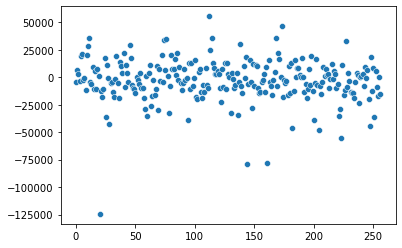

In [17]:
sns.scatterplot(data=performanceDF, x=performanceDF.index, y = performanceDF['predict']-performanceDF['actual'])

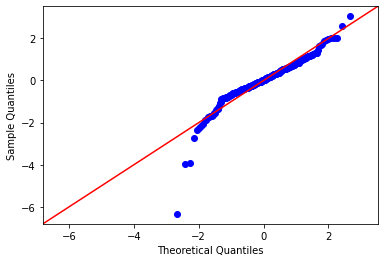

In [18]:
fig = sm.qqplot(performanceDF['predict']-performanceDF['actual'], line='45', fit=True)
plt.show()

## Random Forest

In [20]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [22]:
y = data['SalePrice']

In [25]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [26]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [27]:
y_test = test_data['SalePrice']

In [29]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X, y)
base_accuracy = evaluate(base_model, X_test, y_test)


Model Performance
Average Error: 13335.3210 degrees.
Accuracy = 92.51%.


In [30]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 13216.1859 degrees.
Accuracy = 92.62%.


In [31]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.12%.


In [32]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [300, 400, 500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 5)

In [34]:
grid_search.fit(X, y)
grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   33.1s finished


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 400}

In [35]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 13708.4426 degrees.
Accuracy = 92.37%.


In [36]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.15%.
